## Исследование продаж по видео играм

<img src='games.jpg' style='width:500px;height:350px'/>

 В комании "Тралала", которая является ведущей в области анализа игр, пришел некоторый заказ на исследование. В котором необходимо найти/рассчитать следующие показатели:

 1. Выполнить поиск игры/игр, которую/ые выпускали на максимальном числе данных нам платформ;
 2. Рассчитать топ-3 и антитоп-3 издателя по количеству дохода используя данные Северной Америки и Японии;
 3. Рассчитать на какую платформу выпустили больше всего игр;
 4. Вычислить сколько денег принесла каждая игра в общемировом масштабе;
 5. Изобразить как росло количество издаваемых игр каждый год.

## Загрузка данных и подготовка к анализу

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

In [3]:
try:
    df_sales = pd.read_csv('game_sales.csv')
except:
    print('Ошибка, проверьте правильность заполненных данных')
else:
    print('Данные успешно загружены')


Данные успешно загружены


In [43]:
def get_info(data):
    display(data.head().style.set_caption('Общая информация по датасету'))
    display(data.describe().T)
    print('----')
    print('Информация о пропусках и типах данных')
    print('----')
    print()
    display(data.info())
    print('----')
    print()

In [45]:
get_info(df_sales)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Wii Sports,Wii,2006.000000,Sports,Nintendo,41.490000,29.020000,3.770000,8.460000
1,Super Mario Bros.,NES,1985.000000,Platform,Nintendo,29.080000,3.580000,6.810000,0.770000
2,Mario Kart Wii,Wii,2008.000000,Racing,Nintendo,15.850000,12.880000,3.790000,3.310000
3,Wii Sports Resort,Wii,2009.000000,Sports,Nintendo,15.750000,11.010000,3.280000,2.960000
4,Pokemon Red/Pokemon Blue,GB,1996.000000,Role-Playing,Nintendo,11.270000,8.890000,10.220000,1.000000


,count,mean,std,min,25%,50%,75%,max
Year,16327.0,2006.406443,5.828981,1980.0,2003.0,2007.00,2010.00,2020.00
NA_Sales,16598.0,0.264667,0.816683,0.0,0.0,0.08,0.24,41.49
EU_Sales,16598.0,0.146652,0.505351,0.0,0.0,0.02,0.11,29.02
JP_Sales,16598.0,0.077782,0.309291,0.0,0.0,0.00,0.04,10.22
Other_Sales,16598.0,0.048063,0.188588,0.0,0.0,0.01,0.04,10.57


----
Информация о пропусках и типах данных
----

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16598 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  float64
 6   EU_Sales     16598 non-null  float64
 7   JP_Sales     16598 non-null  float64
 8   Other_Sales  16598 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1.1+ MB


None

----



-------------------------------------

df_sales — результат запроса. В нём содержится следующая информация:

- Name - Название игры
- Platform - Платформа выпуска игры (т.е. PC, PS4 и т.д.)
- Year - Год выпуска игры
- Genre - Жанр игры
- Publisher - Издатель игры
- NA_Sales - Продажи в Северной Америке (в миллионах)
- EU_Sales - Продажи в Европе (в миллионах)
- JP_Sales - Продажи в Японии (в миллионах)
- Other_Sales - Продажи в остальном мире (в миллионах)

Пропуски наблюдаются в колонках 'Year' - 271 и 'Publisher' - 58, в тестовом на исследование указали, что если строк без значений меньше 350, то можно их будет удалить. Странно, но последуем и удалим их. Особой необходимости преобразовывать типы нет, для даты в нашем случае будет подходить и тип float, но для удобства можно преобразовать в int.

Для количества продаж устраивает float64 - вещественные числа. Можно немного уменьшить занимаемую память, понизив тип до float16.

-------------------------------------

In [4]:
df_sales = df_sales.dropna() # удаление колонок с nan значениями
df_sales = df_sales.astype({ 'Year': 'int16',
                             'NA_Sales': 'float16', 
                             'EU_Sales': 'float16', 
                             'JP_Sales': 'float16', 
                             'Other_Sales': 'float16'}) # понижение используемой памяти

In [113]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16291 non-null  object 
 1   Platform     16291 non-null  object 
 2   Year         16291 non-null  int16  
 3   Genre        16291 non-null  object 
 4   Publisher    16291 non-null  object 
 5   NA_Sales     16291 non-null  float16
 6   EU_Sales     16291 non-null  float16
 7   JP_Sales     16291 non-null  float16
 8   Other_Sales  16291 non-null  float16
dtypes: float16(4), int16(1), object(4)
memory usage: 795.5+ KB


-------------------------------------
Незначительно сэкономили занимаемую память и избавились от nan значений.

-------------------------------------

## 1. Выполнить поиск игры/игр, которую/ые выпускали на максимальном числе данных нам платформ.

In [210]:
df_sales[df_sales['Name'] == df_sales['Name'].value_counts().idxmax()].sort_values(by='Year')

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
252,Need for Speed: Most Wanted,PS2,2005,Racing,Electronic Arts,2.029297,1.790039,0.080017,0.469971
1530,Need for Speed: Most Wanted,X360,2005,Racing,Electronic Arts,1.000000,0.170044,0.020004,0.099976
2005,Need for Speed: Most Wanted,XB,2005,Racing,Electronic Arts,0.529785,0.459961,0.000000,0.049988
3585,Need for Speed: Most Wanted,GC,2005,Racing,Electronic Arts,0.429932,0.109985,0.000000,0.020004
5900,Need for Speed: Most Wanted,PC,2005,Racing,Electronic Arts,0.020004,0.229980,0.000000,0.049988
6278,Need for Speed: Most Wanted,DS,2005,Racing,Electronic Arts,0.239990,0.010002,0.000000,0.020004
6492,Need for Speed: Most Wanted,GBA,2005,Racing,Electronic Arts,0.189941,0.070007,0.000000,0.000000
498,Need for Speed: Most Wanted,PS3,2012,Racing,Electronic Arts,0.709961,1.509766,0.059998,0.609863
1173,Need for Speed: Most Wanted,X360,2012,Racing,Electronic Arts,0.620117,0.799805,0.010002,0.150024
1742,Need for Speed: Most Wanted,PSV,2012,Racing,Electronic Arts,0.379883,0.520020,0.010002,0.250000


-------------------------------------
Смотря на вывод, можно обратить внимание на большой промежуток в годах между выпусками. В нашем случае рассматриваются две разные игры, хоть и имеющие одно название. Данное предположение можно проверить с помощью Google. По результату мы можем сказать что данный вывод является неверным и нам не подходит. 

-------------------------------------

<img src='MW_2005.png' style='width:250px;height:350px'/>
<img src='MW_2012.png' style='width:250px;height:350px'/>

In [5]:
df_sales['Name'].value_counts()[1:]

FIFA 14                     9
Ratatouille                 9
LEGO Marvel Super Heroes    9
Cars                        8
LEGO The Hobbit             8
                           ..
PGA Tour 96                 1
Game & Wario                1
Angry Birds                 1
Shadow Hearts: Covenant     1
Know How 2                  1
Name: Name, Length: 11324, dtype: int64

-------------------------------------
Просмотрев следующее число платформ заметим что у нас идут сразу три игры, поэтому мы выведем их все.

-------------------------------------

In [265]:
df_sales[df_sales['Name'] == df_sales['Name'].value_counts()[1:].idxmax()][['Name', 'Platform']]

,Name,Platform
112,FIFA 14,PS3
256,FIFA 14,X360
493,FIFA 14,PS4
1698,FIFA 14,XOne
3988,FIFA 14,PSV
4503,FIFA 14,PC
4538,FIFA 14,Wii
6661,FIFA 14,3DS
7034,FIFA 14,PSP


In [195]:
df_sales[df_sales['Name'] == df_sales['Name'].value_counts()[2:].idxmax()][['Name', 'Platform']]

,Name,Platform
1578,Ratatouille,DS
2445,Ratatouille,PS2
3029,Ratatouille,PSP
3851,Ratatouille,PS3
3857,Ratatouille,Wii
6383,Ratatouille,X360
7703,Ratatouille,GBA
9025,Ratatouille,GC
14395,Ratatouille,PC


In [197]:
df_sales[df_sales['Name'] == df_sales['Name'].value_counts()[3:].idxmax()][['Name', 'Platform']]

,Name,Platform
690,LEGO Marvel Super Heroes,X360
846,LEGO Marvel Super Heroes,PS3
1193,LEGO Marvel Super Heroes,PS4
2007,LEGO Marvel Super Heroes,XOne
2344,LEGO Marvel Super Heroes,3DS
2774,LEGO Marvel Super Heroes,WiiU
3080,LEGO Marvel Super Heroes,PSV
4056,LEGO Marvel Super Heroes,DS
8095,LEGO Marvel Super Heroes,PC


-------------------------------------

Лидирующие позиции в самых многоплатформенных играх занимают - 'FIFA 14', 'Ratatouille', 'LEGO Marvel Super Heroes'. Так же можно заметить, что названия некоторых платформ есть в одних играх, но нет в других. Поэтому можно сделать вывод, что игры содержат не одно и то же множество платформ.

-------------------------------------

## 2. Рассчитать топ-3 и антитоп-3 издателя по количеству дохода используя данные Северной Америки и Японии.

In [249]:
df_sales.groupby(by='Publisher').sum().nlargest(3, 'NA_Sales')['NA_Sales']

Publisher
Nintendo           816.0
Electronic Arts    584.0
Activision         426.0
Name: NA_Sales, dtype: float16

In [260]:
df_sales.groupby(by='Publisher').sum().nsmallest(3, 'NA_Sales')['NA_Sales']

Publisher
2D Boy      0.0
49Games     0.0
7G//AMES    0.0
Name: NA_Sales, dtype: float16

-------------------------------------

Результаты вывода по Северной Америке показывают, что самые высокие позиции доходах у:
- Nintendo - $816 миллиона

- Electronic Arts - $584 миллиона

- Activision - $426 миллиона 

А самые низкие:
- 2D Boy - $0.0 миллиона 

- 49Games - $0.0 миллиона 

- 7G//AMES - $0.0 миллиона 

В результатах мы видим, что у антитопа прослеживаются нулевые доходы. Возможно это связанно с тем, что доходы компании были настолько малы, что данные в итоге не могут поддержаться, либо же эти компании не участвовали на американском рынке.

-------------------------------------

In [255]:
df_sales.groupby(by='Publisher').sum().nlargest(3, 'JP_Sales')['JP_Sales']

Publisher
Nintendo                        455.0000
Namco Bandai Games              126.8125
Konami Digital Entertainment     90.9375
Name: JP_Sales, dtype: float16

In [261]:
df_sales.groupby(by='Publisher').sum().nsmallest(3, 'JP_Sales')['JP_Sales']

Publisher
10TACLE Studios                 0.0
1C Company                      0.0
20th Century Fox Video Games    0.0
Name: JP_Sales, dtype: float16

-------------------------------------
Результаты же вывода по Японии показывают что самые высокие позиции в доходах у:
- Nintendo - $455 миллиона

- Namco Bandai Games - $126.8125 миллиона

- Konami Digital Entertainment - $90.9375 миллиона

А самые низкие:
- 10TACLE Studios - $0.0 миллиона

- 1C Company - $0.0 миллиона

- 20th Century Fox Video Games - $0.0 миллиона

В случае же с самыми малыми доходами мы можем наблюдать ту же картину что и на американском рынке. Либо доходы компании малы, либо они не участвовали в японском рынке

-------------------------------------

## 3. Рассчитать на какую платформу выпустили больше всего игр.

In [291]:
df_sales.value_counts('Platform').nlargest(1)

Platform
DS    2131
dtype: int64

In [292]:
df_sales.value_counts('Platform').nlargest(2)

Platform
DS     2131
PS2    2127
dtype: int64

-------------------------------------
В результате мы можем заметить, что большинство игр вышло на Nintendo DS. Что примечательно, другая платформа 
так же японского производителя - Sony PS2, отстала всего на 4 позиции в нашем DataFrame от лидирующего места. 


-------------------------------------

## 4. Вычислить сколько денег принесла каждая игра в общемировом масштабе.


In [382]:
df_sales['World_Sales'] = df_sales['NA_Sales'] + df_sales['EU_Sales'] + \
                          df_sales['JP_Sales'] + df_sales['Other_Sales']

In [384]:
df_sales.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,World_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.500000,29.015625,3.769531,8.460938,82.68750
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.078125,3.580078,6.808594,0.770020,40.25000
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.851562,12.882812,3.789062,3.310547,35.84375
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.750000,11.007812,3.279297,2.960938,33.00000
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.273438,8.890625,10.218750,1.000000,31.37500


-------------------------------------

С помощью сложения каждого столбца по каждой строке мы добились результата характеризующий мировой доход по каждой игре в нашем DataFrame. Теперь, когда нам известен мировой доход, мы сможем вычислять во сколько раз конкретная игра заработала больше/меньше другой или рассчитать процентный доход игры отсносительно издателя который выпустил ее.

-------------------------------------

## 5. Изобразить как росло количество издаваемых игр каждый год.

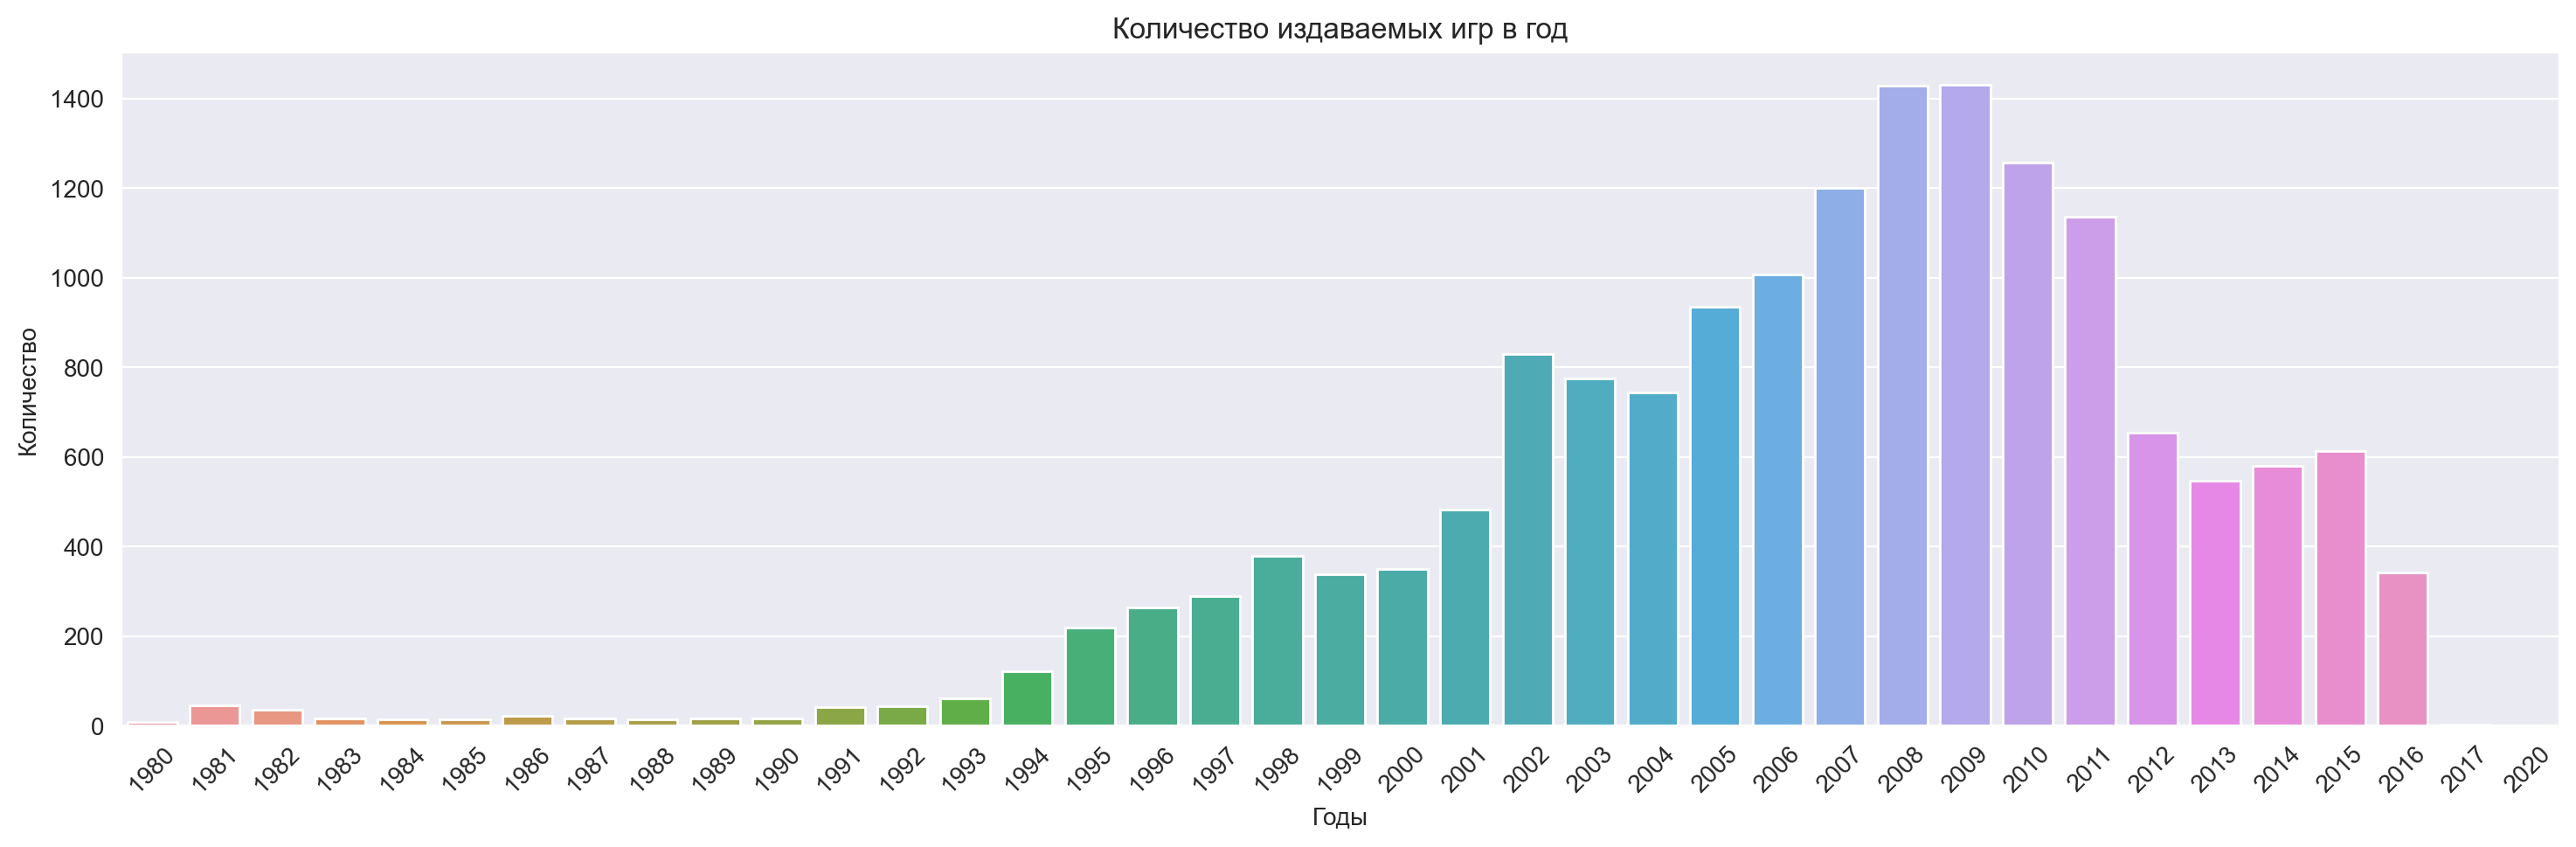

In [373]:
plt.figure(figsize=(18, 5), dpi=200)
plt.xticks(rotation=45)
plt.title("Количество издаваемых игр в год")

sns.countplot(data=df_sales, x='Year')

plt.xlabel("Годы")
plt.ylabel("Количество")

plt.show()

In [350]:
df_sales.groupby(by='Year').count()['Name'].sort_values(ascending=False).head()

Year
2009    1431
2008    1428
2010    1257
2007    1201
2011    1136
Name: Name, dtype: int64

In [394]:
df_sales.groupby(by='Year').count()['Name'].sort_values(ascending=True).head(5)

Year
2020     1
2017     3
1980     9
1984    14
1985    14
Name: Name, dtype: int64

------------------------------------
Наиболее результативные года - 2009, 2008

Наименее результативные года - 2020, 2017

Так же на графике мы можем наблюдать как с 1991 года пошел активный рост количества игр, пик которого был в 2009 году и составлял 1431 игры с последующим уменьшением количества до всего одной к 2020 году.


-------------------------------------

## Вывод

- Из csv-файла извлекли необходмые данные - типы данных не требуют преобразования, пропуски были найдены в двух колонка и ввиду целей был произведен дроп nan значений


- Наиболее многоплатформенные игры - 'FIFA 14', 'Ratatouille', 'LEGO Marvel Super Heroes'. Эти игры были выпущенны на 9 различных платформах


- Лидирующие позиции по выручке:

     - Америке - Nintendo, EA, Activision

     - Японии - Nintendo, Namco Bandai Games , Konami Digital Entertainment
     

- Платформа на которую выпускали чаще всего игры - Nintendo DS. При анализе было обнаруженно, что платформа DS ушла на 4 позиции больше, чем другая платформа от другого японского гиганта Sony - PS2


- Так же было выяснено сколько каждая игра принесла в общемировом масштабе для того, чтобы производить по необходимости более глубокий анализ причастности каждой игры к определенному показателю


- Был сделан показательный график количества выпускаемых игр в каждый год:
    -  2009 и 2008 - самые результативные года с точки зрения количества выпускаемых игр
    -  2020 и 2017 - оказались самыми наименнее результативными годами.